
🎯 예측할 제품명을 입력하세요 (전체 제품은 'ALL' 입력, '*' 입력 시 처음으로, '**' 입력 시 종료):  all


✅ 전체 제품 데이터를 사용하여 예측을 진행합니다.

✅ 전체 제품 데이터를 사용하여 예측을 진행합니다. (100.0% 완료)     🚴‍♂️
✅ 모든 제품의 예측이 완료되었습니다! 🎉

📦 검색할 제품은 아무숫자를 입력하세요, @ : 해당 제품 건너뛰기, % : 입력된 제품만 분석, * : 초기화 , ** : 전체 종료 


   Hitch Rack - 4-Bike:  600
   All-Purpose Bike Stand:  600
   Mountain Bottle Cage:  0650
   Water Bottle - 30 oz.:  45
   Road Bottle Cage:  13
   AWC Logo Cap:  


❌ 숫자를 입력해주세요.


   AWC Logo Cap:  1
   Bike Wash - Dissolver:  2
   Fender Set - Mountain:  


❌ 숫자를 입력해주세요.


   Fender Set - Mountain:  2
   Half-Finger Gloves, L:  13
   Half-Finger Gloves, M:  


❌ 숫자를 입력해주세요.


   Half-Finger Gloves, M:  12
   Half-Finger Gloves, S:  1
   Sport-100 Helmet, Black:  


❌ 숫자를 입력해주세요.


   Sport-100 Helmet, Black:  


❌ 숫자를 입력해주세요.


   Sport-100 Helmet, Black:  5
   Sport-100 Helmet, Red:  5
   Sport-100 Helmet, Blue:  5
   Hydration Pack - 70 oz.:  5
   Short-Sleeve Classic Jersey, XL:  5
   Short-Sleeve Classic Jersey, L:  5
   Short-Sleeve Classic Jersey, M:  5
   Short-Sleeve Classic Jersey, S:  5
   Long-Sleeve Logo Jersey, M:  5
   Long-Sleeve Logo Jersey, XL:  5
   Long-Sleeve Logo Jersey, L:  5
   Long-Sleeve Logo Jersey, S:  5
   Mountain-100 Silver, 38:  5
   Mountain-100 Silver, 44:  55
   Mountain-100 Black, 48:  5
   Mountain-100 Silver, 48:  5
   Mountain-100 Black, 38:  5
   Mountain-200 Silver, 38:  


❌ 숫자를 입력해주세요.


   Mountain-200 Silver, 38:  5
   Mountain-100 Black, 44:  5
   Mountain-100 Silver, 42:  5
   Mountain-200 Black, 46:  5
   Mountain-200 Silver, 42:  5
   Mountain-200 Silver, 46:  5
   Mountain-200 Black, 38:  5
   Mountain-100 Black, 42:  %


🔹 입력을 중단하고 선택된 제품만 분석합니다.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/id/VENV/vdjango/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/id/VENV/vdjango/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/id/VENV/vdjango/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print

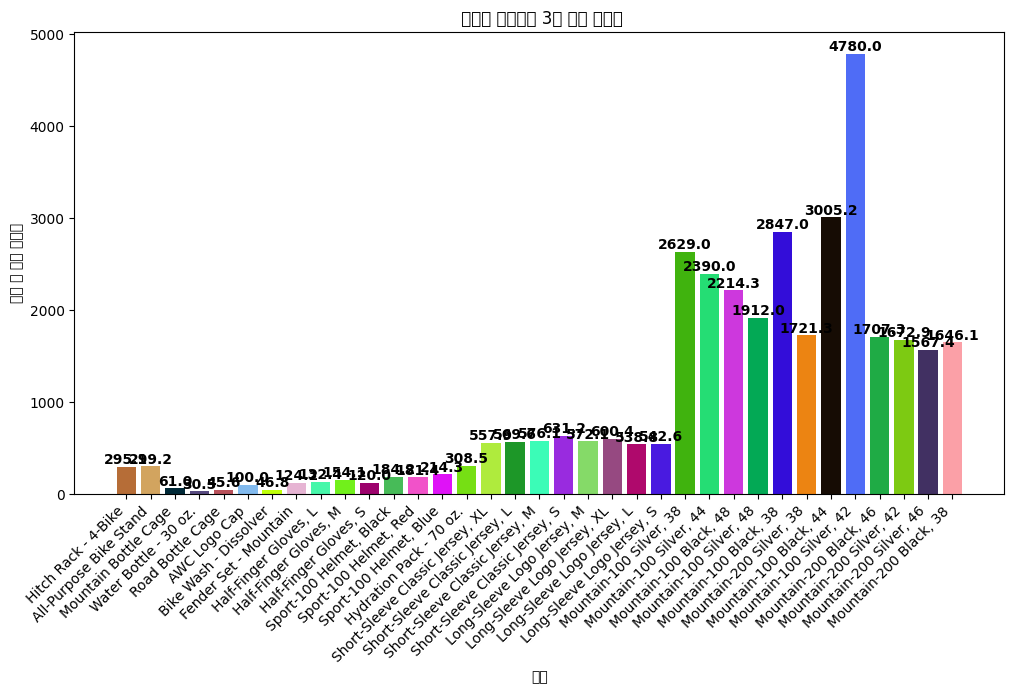

In [2]:
# ✅ 4. 제품별 Prophet 모델 학습 및 필요자료 import
import sys
import time
import logging
from itertools import cycle
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from prophet import Prophet
import datetime
import random


------------------------------------------------------------------------------------------------------
# Prophet 초기화 작업
_ = Prophet()

# ✅ 1. 데이터 로드
df = pd.read_csv("sales_data.csv")

# ✅ 2. 제품 목록 확인 (대소문자 구분 없이 저장)
df["Product"] = df["Product"].str.strip()
product_list = df["Product"].unique()
product_list_upper = [p.upper() for p in product_list]


# ✅ 제품명 선택 함수 (재귀 호출 사용)
def select_product():
    while True:
        target_product = input("\n🎯 예측할 제품명을 입력하세요 (전체 제품은 'ALL' 입력, '*' 입력 시 처음으로, '**' 입력 시 종료): ").strip()

        # '**' 입력 시 프로그램 종료
        if target_product == "**":
            print("🚨 예측을 취소하고 프로그램을 종료합니다.")
            sys.exit()  # 프로그램 즉시 종료

        # '*' 입력 시 제품명 입력부터 다시 시작 (재귀 호출)
        if target_product == "*":
            print("🔄 입력을 초기화하고 제품 선택 단계로 돌아갑니다.")
            return select_product()  # 함수 자체를 다시 호출해서 처음부터 다시 시작

        # 빈 입력 방지
        if not target_product:
            print("❌ 제품명을 입력해주세요.")
            continue

        # 'ALL' 입력 처리
        if target_product.upper() == "ALL":
            print("✅ 전체 제품 데이터를 사용하여 예측을 진행합니다.")
            return "ALL"

        # 대소문자 구분 없이 제품 확인
        if target_product.upper() in product_list_upper:
            target_product = product_list[product_list_upper.index(target_product.upper())]
            print(f"✅ '{target_product}' 제품을 찾았습니다. 예측을 진행합니다...")
            return target_product
        else:
            print(f"❌ '{target_product}' 제품이 데이터에 존재하지 않습니다. 다시 입력해주세요.")


# ✅ 제품 선택 시작
target_product = select_product()

# ✅ 3. 날짜 변환 및 컬럼명 변경
df = df.rename(columns={"Date": "ds", "Cost": "y", "Product": "product"})
df["ds"] = pd.to_datetime(df["ds"])
df["y"] = pd.to_numeric(df["y"], errors="coerce")
df = df.dropna()


# ✅ cmdstanpy 로그 비활성화
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux (Ubuntu)
plt.rcParams['axes.unicode_minus'] = False  # 음수(-) 깨짐 방지


# 자전거 이모지 모션을 위한 프레임 리스트
bike_frames = cycle(["    🚴‍♂️", "  🚴‍♂️  ", "🚴‍♂️    " ])  # 순환하는 애니메이션  

forecast_results = {}

# 🔥 여기 수정: 대소문자 구분 없이 비교
if target_product.strip().lower() == "all":  
    product_list = df["product"].unique()
    print("\n✅ 전체 제품 데이터를 사용하여 예측을 진행합니다.", end="")  # 초기 메시지 출력
else:
    product_list = [target_product]

total_products = len(product_list)  # 전체 제품 개수

for idx, product in enumerate(product_list, start=1):
    progress = (idx / total_products) * 100  # 진행률 계산
    bike_icon = next(bike_frames)  # 자전거 모션 업데이트

    # '\r'를 사용해 한 줄에서 업데이트
    print(f"\r✅ 전체 제품 데이터를 사용하여 예측을 진행합니다. ({progress:.1f}% 완료) {bike_icon}", end="")
    sys.stdout.flush()  # 즉시 출력 반영

    # Prophet 모델 학습
    product_df = df[df["product"] == product]
    model = Prophet()
    model.fit(product_df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    forecast_results[product] = forecast

    time.sleep(0.3)  # 진행 속도 조절

# 완료 후 개행하여 최종 메시지 출력
print("\n✅ 모든 제품의 예측이 완료되었습니다! 🎉")






# ✅ 5. 제품별 재고 최적화 계산 및 그래프 표시
lead_time = 7
safety_stock_factor = 1.2

# ✅ 'ALL' 검색 시 한 번에 모든 제품 재고량 입력 받기 (추가 기능: @ 건너뛰기, % 중간 분석, * 제품 선택으로, ** 종료)
stock_inputs = {}
selected_products = []
if target_product.upper() == "ALL":
    print("\n📦 검색할 제품은 아무숫자를 입력하세요, @ : 해당 제품 건너뛰기, % : 입력된 제품만 분석, * : 초기화 , ** : 전체 종료 ")
    for product in product_list:
        while True:
            user_input = input(f"   {product}: ").strip()

            if user_input == "**":
                print("🚨 프로그램을 종료합니다.")
                sys.exit()  # 프로그램 즉시 종료

            elif user_input == "*":
                print("🔄 제품 선택 단계로 돌아갑니다.")
                # 다시 제품명을 입력받도록 루프 처음으로 이동
                target_product = select_product()  # 제품 선택부터 다시 시작
                break

            elif user_input == "%":
                print("🔹 입력을 중단하고 선택된 제품만 분석합니다.")
                product_list = selected_products  # 입력된 제품만 리스트에 유지
                break

            elif user_input == "@":
                print(f"🔹 '{product}' 제품을 건너뜁니다.")
                break

            try:
                stock_inputs[product] = float(user_input)
                selected_products.append(product)
                break
            except ValueError:
                print("❌ 숫자를 입력해주세요.")
        if user_input in ["*", "%"]:
            break

for product in product_list:
    forecast = forecast_results[product]
    forecast["demand"] = forecast["yhat"].clip(lower=0)
    average_demand = forecast["demand"].mean()
    safety_stock = average_demand * safety_stock_factor
    reorder_point = average_demand * lead_time + safety_stock

    if target_product.upper() == "ALL":
        current_stock = stock_inputs.get(product, None)  # 건너뛴 제품(None) 제외
        if current_stock is None:
            continue  # 건너뛴 제품은 계산하지 않음
    else:
        while True:
            try:
                current_stock = float(input(f"\n📦 '{product}'의 현재 재고량을 입력하세요: "))
                break
            except ValueError:
                print("❌ 숫자를 입력해주세요.")

    days_until_stock_out = current_stock / average_demand
    reorder_date = pd.to_datetime("today") + pd.Timedelta(days=days_until_stock_out)
------------------------------------------------------------------------------------------------------ # 기존 데이터 셋

    # ✅ ALL 검색 시 현재 달의 평균 수요량을 제품별로 출력
if target_product.upper() == "ALL" and selected_products:
    current_month = datetime.datetime.now().month
    plt.figure(figsize=(12, 6))
    avg_demand_list = []
    for product in selected_products:
        product_df = df[df["product"] == product]
        avg_demand = product_df[product_df["ds"].dt.month == current_month]["y"].mean()
        avg_demand_list.append(avg_demand)
    colors = ["#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)]) for _ in selected_products]
    bars = plt.bar(selected_products, avg_demand_list, color=colors)
    plt.xlabel("제품")
    plt.ylabel("현재 달 평균 수요량")
    plt.title(f" 선택한 제품들의 {current_month}월 평균 수요량")
    plt.xticks(rotation=45, ha='right')

    for bar, value in zip(bars, avg_demand_list):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.show()

# ✅ 개별 제품 검색 시 월별 평균 수요량 그래프 출력
if target_product.upper() != "ALL":
    df["month"] = df["ds"].dt.month
    monthly_avg_demand = df.groupby("month")["y"].mean()
    current_month = datetime.datetime.now().month
    colors = ['red' if month == current_month else 'skyblue' for month in monthly_avg_demand.index]
    plt.figure(figsize=(10, 5))
    bars = plt.bar(monthly_avg_demand.index, monthly_avg_demand, color=colors)
    plt.xlabel("월")
    plt.ylabel("평균 수요량")
    plt.title(f" {target_product}의 월별 평균 수요량 (전체 연도 평균)")
    plt.xticks(range(1, 13), [f"{m}월" for m in range(1, 13)])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar, month, value in zip(bars, monthly_avg_demand.index, monthly_avg_demand):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.show()